# **Importar** las bibliotecas necesarias

> Instalar librerias con el siguiente comando:  `pip install -r requirements.txt`

In [6]:
import pandas as pd
import requests

# Google Driver
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload
from google.oauth2 import service_account
import json



import matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile
import io
import os

# Paso 1: Descargar el conjunto de datos

In [ ]:
# URL del archivo comprimido
url = "https://archive.ics.uci.edu/static/public/502/online+retail+ii.zip"

# Descargar el archivo y descomprimirlo
with requests.get(url) as r:
    with zipfile.ZipFile(io.BytesIO(r.content)) as z:
        z.extractall(path="./prueba_i2ds/")

# Ahora los archivos están descomprimidos en la ruta "./prueba_i2ds/" y listos para ser utilizados


# Paso 2: Conexión a Google Drive y Google Sheets

- Subir archvio a Google Drive

In [ ]:
# Leer el contenido del archivo JSON
with open("./client_secrets.json", "r") as json_file:
    json_content = json.load(json_file)


# Credenciales de servicio
credentials = service_account.Credentials.from_service_account_info(
    json_content, scopes=['https://www.googleapis.com/auth/drive']
)

# Crear el servicio de Google Drive
drive_service = build('drive', 'v3', credentials=credentials)

# ID de la carpeta "prueba i2ds" en Google Drive
folder_id = '1FdyTzg04CGQCdPBJ5IeDjTDBH-o8oaRn'

# Ruta local al archivo que deseas subir
local_file_path = './prueba_i2ds/online_retail_II.xlsx'

# Metadata del archivo
file_metadata = {
    'name': 'online_retail_data.xlsx',
    'parents': [folder_id]
}

# Subir el archivo a Google Drive
media = MediaFileUpload(local_file_path, mimetype='application/vnd.openxmlformats-officedocument.spreadsheetml.sheet')
file = drive_service.files().create(body=file_metadata, media_body=media, fields='id').execute()

print('Archivo subido con éxito a Google Drive en la carpeta "prueba i2ds"')


- Leer el archivo .xlsx

In [ ]:
# Leer el archivo desde Google Sheets y convertirlo a un DataFrame
spreadsheet_id = 'YOUR_SPREADSHEET_ID_HERE'  # Reemplazar con el ID de la hoja de cálculo
range_name = 'Sheet1'  # Reemplazar con el nombre de la hoja de cálculo
sheet = build('sheets', 'v4', credentials=credentials).spreadsheets()
result = sheet.values().get(spreadsheetId=spreadsheet_id, range=range_name).execute()
values = result.get('values', [])

df = pd.DataFrame(values[1:], columns=values[0])  # Crear el DataFrame desde los datos de Google Sheets

# Paso 3: Manipulación de Datos con Pandas

In [65]:
# Filtrado
df = pd.read_excel("./prueba_i2ds/online_retail_II.xlsx")
df.head(5)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
# Filtros
filtered_df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]  # Filtrar datos con cantidad y precio positivos

# Determinar el país que más productos consume
country_consumption = filtered_df.groupby('Country')['Quantity'].sum().idxmax()

# Identificar los productos más vendidos
popular_products = filtered_df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Análisis de patrones y tendencias
# Para este ejemplo, vamos a analizar la cantidad de ventas por mes
filtered_df['InvoiceDate'] = pd.to_datetime(filtered_df['InvoiceDate'])
filtered_df['Month'] = filtered_df['InvoiceDate'].dt.month
monthly_sales = filtered_df.groupby('Month')['Quantity'].sum()

# Análisis de correlación
# correlation_matrix = filtered_df.corr()


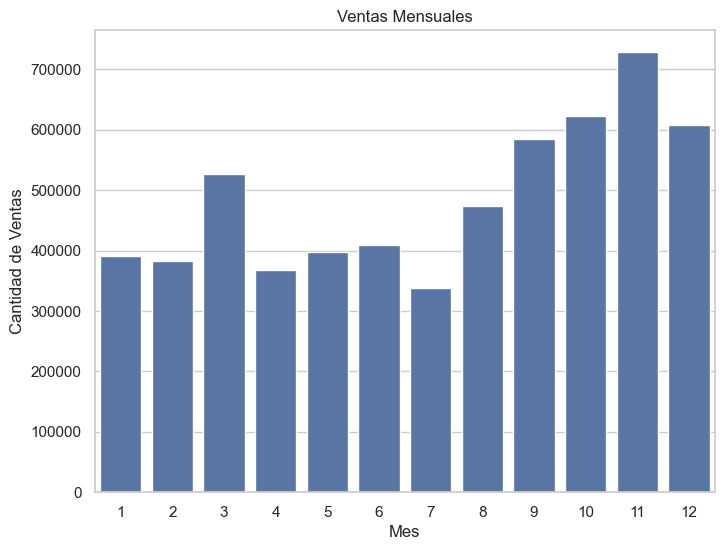

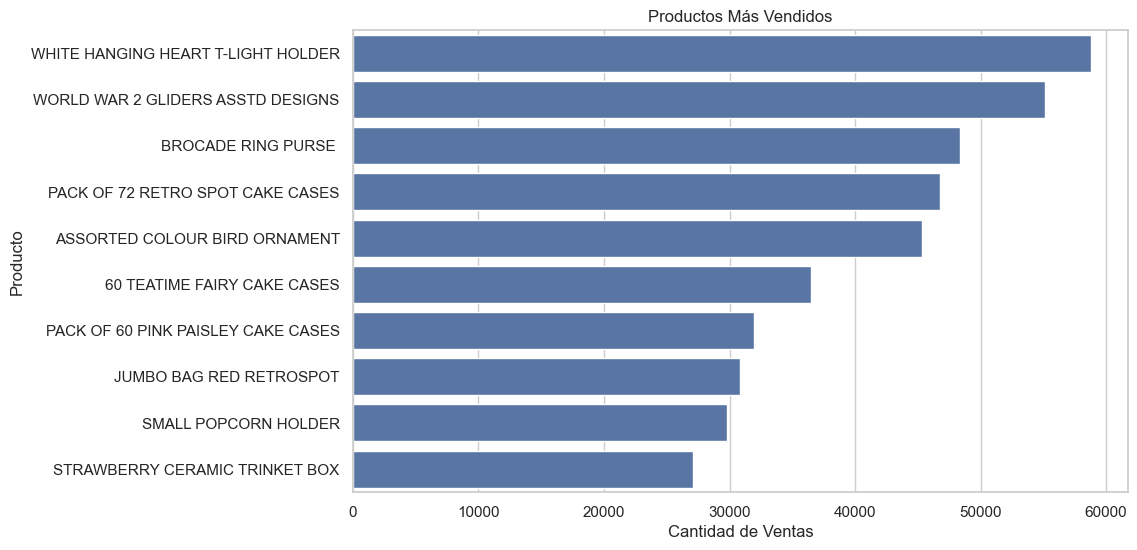

In [86]:
# Crear visualizaciones informativas

# Visualización de ventas mensuales
plt.figure(figsize=(8, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.xlabel('Mes')
plt.ylabel('Cantidad de Ventas')
plt.title('Ventas Mensuales')
plt.show()

# Visualización de los productos más vendidos
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_products.values, y=popular_products.index)
plt.xlabel('Cantidad de Ventas')
plt.ylabel('Producto')
plt.title('Productos Más Vendidos')
plt.show()

# Matriz de correlación
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Matriz de Correlación')
# plt.show()
